In [1]:
import sys
sys.path.append('../')
from camo_dataset import get_loader

x, y = get_loader('../raw')
data = next(iter(x))

Train Loaded CAAD10K 0
Train Loaded NC4K 2000
Train Loaded CAMO 1000
====Train Loaded 6040 images
Test Loaded CAAD10K 0
Test Loaded NC4K 280
Test Loaded CAMO 250
====Test Loaded 2556 images


In [2]:
from tqdm.auto import tqdm
for b in tqdm(x):
    pass

  0%|          | 0/6040 [00:00<?, ?it/s]

Skipped mask prompt for ../raw/CAMO/CAMO-COCO-V.1.0/CAMO-COCO-V.1.0-CVIU2019/Camouflage/Images/Train/camourflage_00347.jpg after 100 attempts
Skipped mask prompt for ../raw/COD10K-v3/Train/Image/COD10K-CAM-3-Flying-55-Butterfly-3395.jpg after 100 attempts
Skipped mask prompt for ../raw/nc4k/fix_rank_dataset2000/img/COD10K-CAM-2-Terrestrial-46-StickInsect-2840.jpg after 100 attempts
Skipped mask prompt for ../raw/nc4k/fix_rank_dataset2000/img/COD10K-CAM-2-Terrestrial-21-Ant-1254.jpg after 100 attempts
Skipped mask prompt for ../raw/COD10K-v3/Train/Image/COD10K-CAM-1-Aquatic-15-SeaHorse-971.jpg after 100 attempts
Skipped mask prompt for ../raw/COD10K-v3/Train/Image/COD10K-CAM-3-Flying-56-Cicada-3550.jpg after 100 attempts
Skipped mask prompt for ../raw/CAMO/CAMO-COCO-V.1.0/CAMO-COCO-V.1.0-CVIU2019/Camouflage/Images/Train/camourflage_00007.jpg after 100 attempts


In [2]:
data[0]['image'].shape

torch.Size([3, 1024, 855])

In [3]:
data[0]['gt_mask'].shape

torch.Size([2, 1024, 855])

In [4]:
data[0]['original_size']

[1024, 855]

In [5]:
data[0]['point_coords'], data[0]['point_coords'].shape

(tensor([[[130.,  16.],
          [180.,  32.]],
 
         [[ 85., 235.],
          [125., 225.]]]),
 torch.Size([2, 2, 2]))

In [6]:
data[0]['point_labels']

tensor([[1, 1],
        [1, 1]], dtype=torch.int32)

In [12]:
data = next(iter(x))

[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])]
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
torch.Size([256, 256])


In [13]:
data[0]['mask_input'].shape

torch.Size([1, 256, 256])

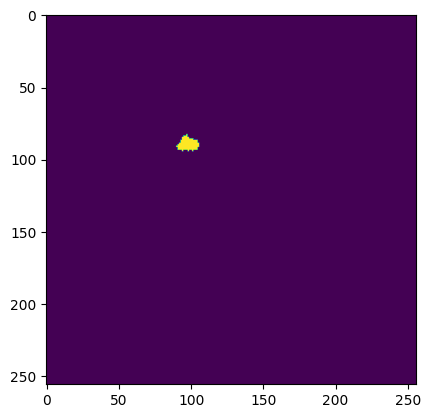

In [14]:
import matplotlib.pyplot as plt
plt.imshow(data[0]['mask_input'][0].numpy())

In [2]:
from PIL import Image

def rgb_loader(path):
    with open(path, "rb") as f:
        img = Image.open(f)
        return img.convert("RGB")
def binary_loader(path):
    with open(path, "rb") as f:
        img = Image.open(f)
        return img.convert("L")

In [2]:
# import os
# sizes = []
# path = "../raw/MoCA-Mask/MoCA_Video/TrainDataset_per_sq/"
# for i in os.listdir(path):
#     obj = os.path.join(path, i)
#     y = os.listdir(obj+"/Imgs/")[0]
#     x = rgb_loader(obj+"/Imgs/" + y)
#     if x.size not in sizes:
#         sizes.append(x.size)
        
# print([(i/j, f"{i}:{j}") for (i,j) in sizes])
        

In [3]:
# import os
# sizes = []
# path = "../raw/DAVIS/Annotations/Full-Resolution/"
# for i in os.listdir(path):
#     obj = os.path.join(path, i)
#     y = os.listdir(obj)[0]
#     x = rgb_loader(obj+"/" + y)
#     if x.size not in sizes:
#         sizes.append(x.size)
        
# print([(i/j, f"{i}:{j}") for (i,j) in sizes])

In [3]:
###NC4K
import os
from collections import Counter
path = "../raw/nc4k"
train = os.path.join(path, "fix_rank_dataset2000")
test = os.path.join(path, "fix_rank_test_dataset")

img_path = os.path.join(train, "img")
gt_path = os.path.join(train, "instance")
img_list = []
gt_list = []

for i in sorted(os.listdir(img_path)):
    img_list.append(os.path.join(img_path, i))
    gt_list.append(os.path.join(gt_path, i.split(".")[0]+".png"))

len(img_list), len(gt_list)

(2000, 2000)

In [7]:
import numpy as np
c = []
for i in gt_list:
    img = binary_loader(i)
    c.append(len(np.unique(img)))
    
Counter(c)

Counter({2: 1825, 3: 123, 4: 31, 5: 7, 7: 7, 6: 3, 8: 3, 9: 1})

In [8]:
####CAMO

path = "../raw/CAMO/CAMO-COCO-V.1.0/CAMO-COCO-V.1.0-CVIU2019/Camouflage"

img_path = path+"/Images/Train"
gt_path = path+"/GT"
img_list = []
gt_list = []

for i in sorted(os.listdir(img_path)):
    img_list.append(os.path.join(img_path, i))
    gt_list.append(os.path.join(gt_path, i.split(".")[0]+".png"))

len(img_list), len(gt_list)

(1000, 1000)

In [9]:
import numpy as np
c = []
for i in gt_list:
    img = binary_loader(i)
    c.append(len(np.unique(img)))
    
Counter(c)

Counter({2: 998, 253: 1, 8: 1})

In [10]:
# unique_sizess = []
# from tqdm.auto import tqdm
# import numpy as np
# import matplotlib.pyplot as plt

# mask_valid = 0
# for img_ in tqdm(img_list):
#     img = rgb_loader(img_)
#     if len(np.unique(np.asarray(binary_loader(gt_list[img_list.index(img_)])))) > 0:
#         mask_valid += 1

#     if img.size not in unique_sizess:
#         unique_sizess.append(img.size)
        

# print(len(unique_sizess))
# # print([(i/j, f"{i}:{j}") for (i,j) in unique_sizess])

In [4]:
#CAD10K
import os
path = "../raw/COD10K-v3"
train = os.path.join(path, "Train")
test = os.path.join(path, "Test")

img_path = os.path.join(train, "Image")
gt_path = os.path.join(train, "GT_Instance")

info = open(train+"/CAM-NonCAM_Instance_Train.txt", 'r').readlines()

count = 0
img_list = []
gt_list = []
instances = []

c = []
obj = []
for i in info:
    if "[INFO]" in i:
        i = i.lstrip().rstrip()
        c.append(int(i[-1]))
        if int(i[-1]) >= 1:
            name = i.split(" ")[-2].split(".")[0]
            img_list.append(os.path.join(img_path, name+'.jpg'))
            gt_list.append(os.path.join(gt_path, name+'.png'))
    

# for img, gt in zip(sorted(os.listdir(img_path)),  sorted(os.listdir(gt_path))):
#     count+=1
#     assert img.split(".")[0] == gt.split(".")[0], print(f"{img} != {gt}")
#     img_list.append(os.path.join(img_path, img))
#     gt_list.append(os.path.join(gt_path, gt))
    
# img_list = [os.path.join(img_path, i) for i in  sorted(os.listdir(img_path))]
# gt_list = [os.path.join(gt_path, i) for i in  sorted(os.listdir(gt_path))]




Counter(c)

 

Counter({0: 2960, 1: 2744, 2: 204, 3: 48, 4: 17, 5: 8, 6: 8, 7: 6, 8: 5})

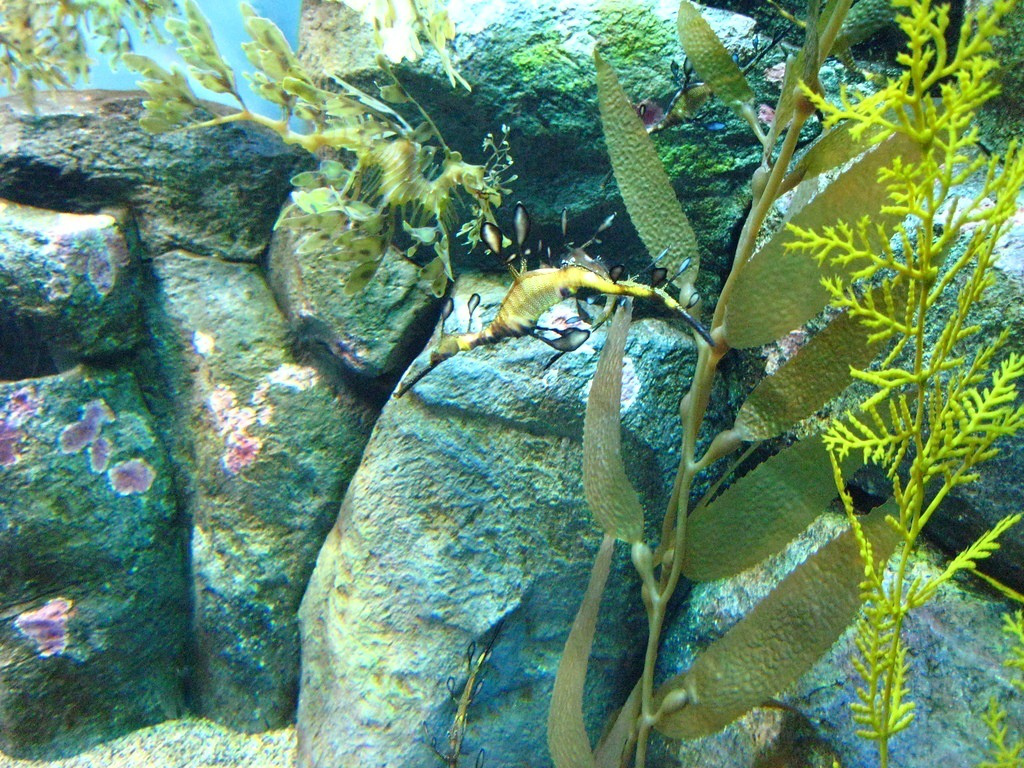

In [5]:
rgb_loader(img_list[10])

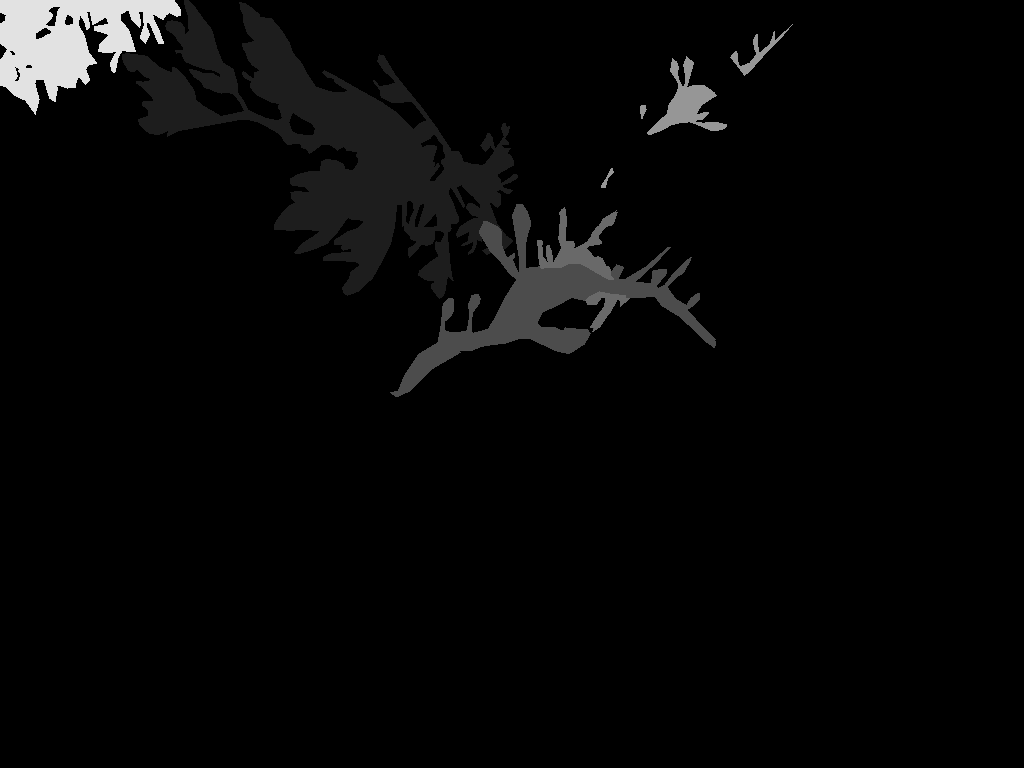

In [6]:
gt_mask = binary_loader(gt_list[10])
gt_mask

In [9]:
import numpy as np
np.asarray(gt_mask).shape

(768, 1024)

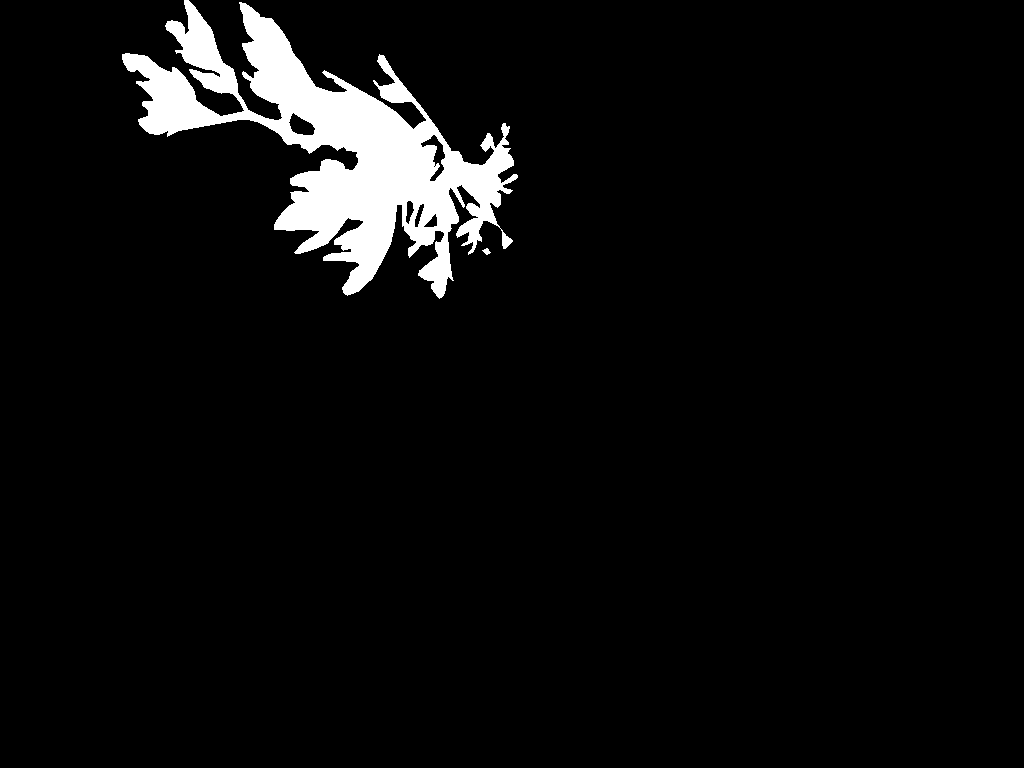

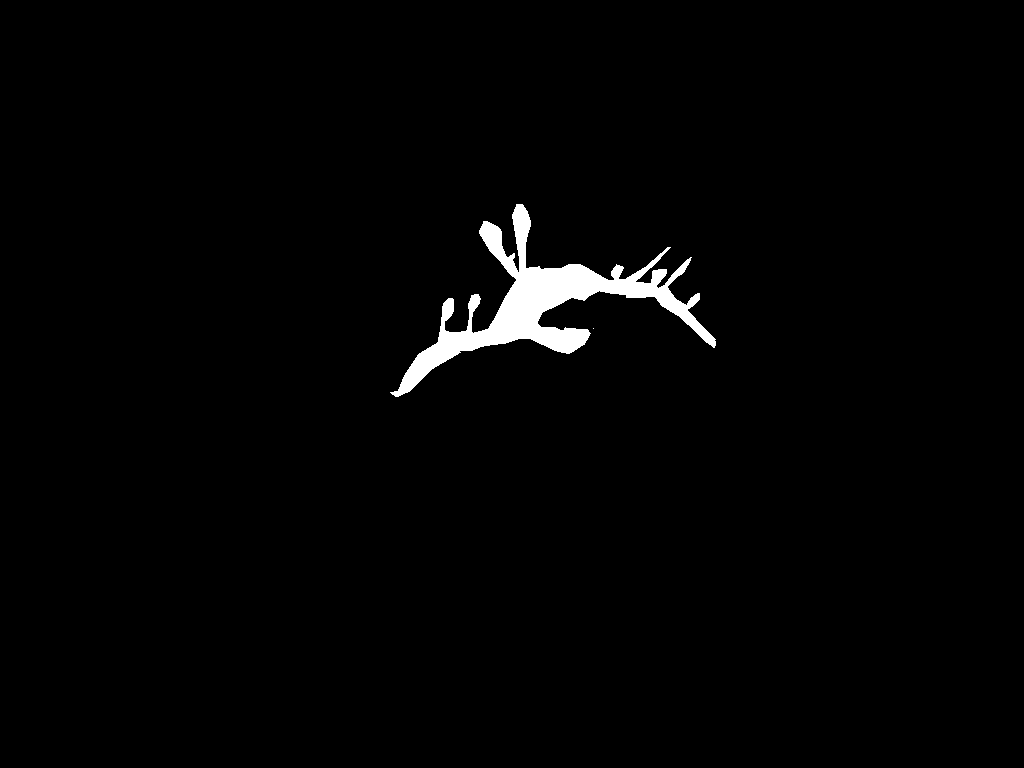

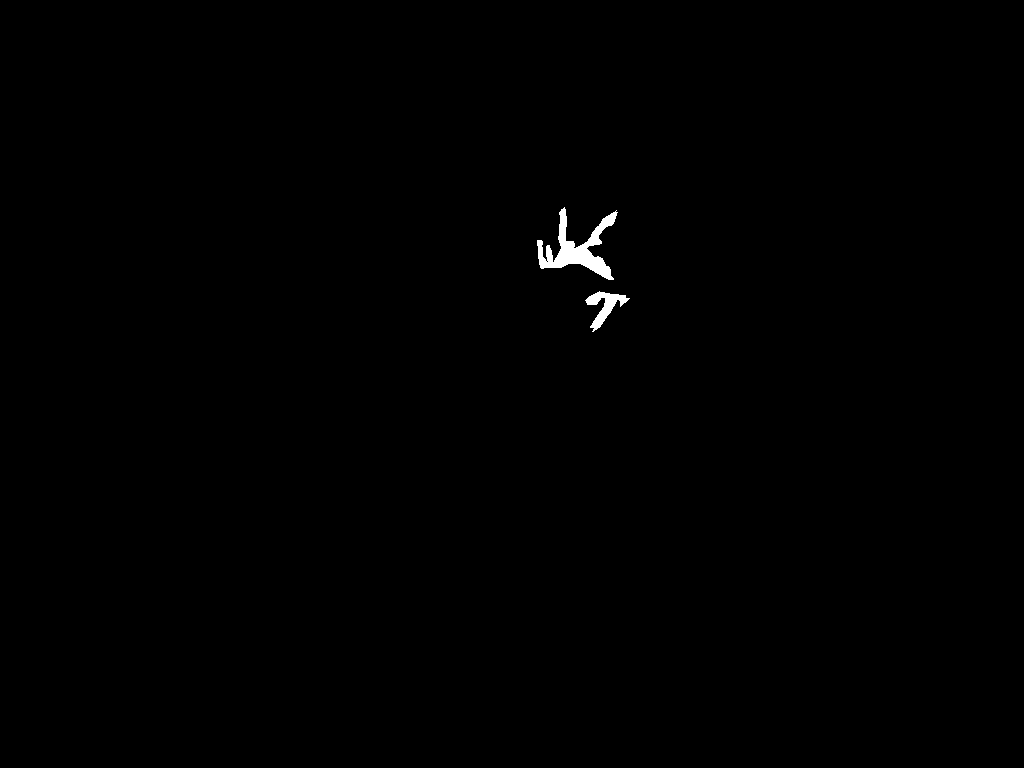

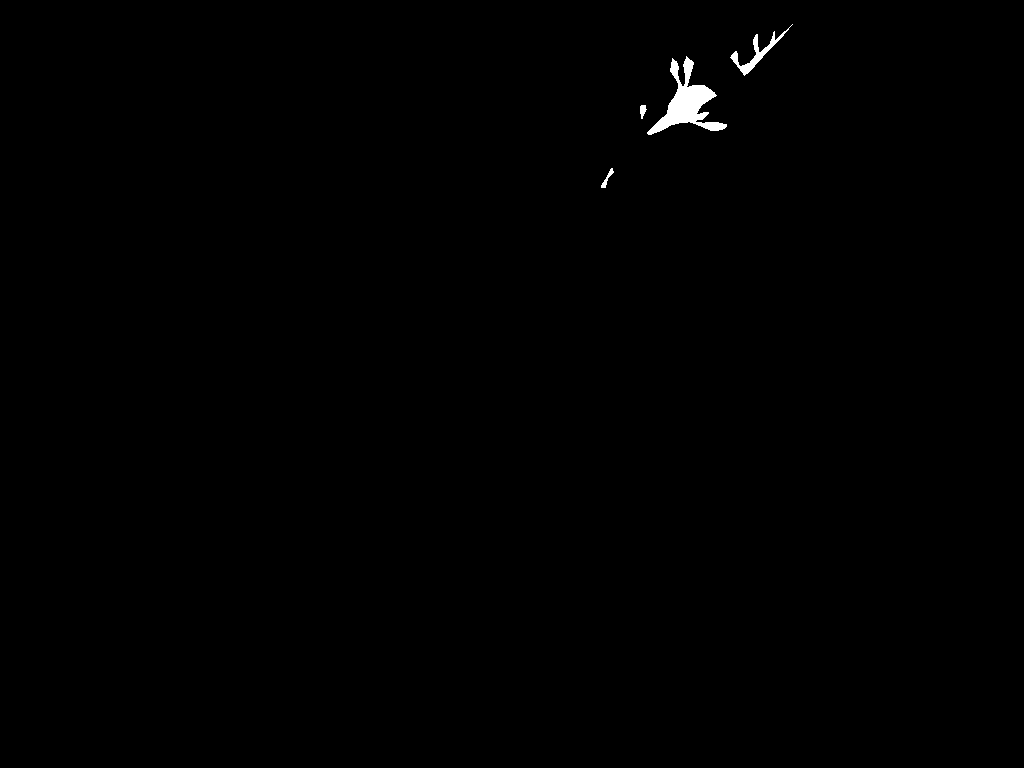

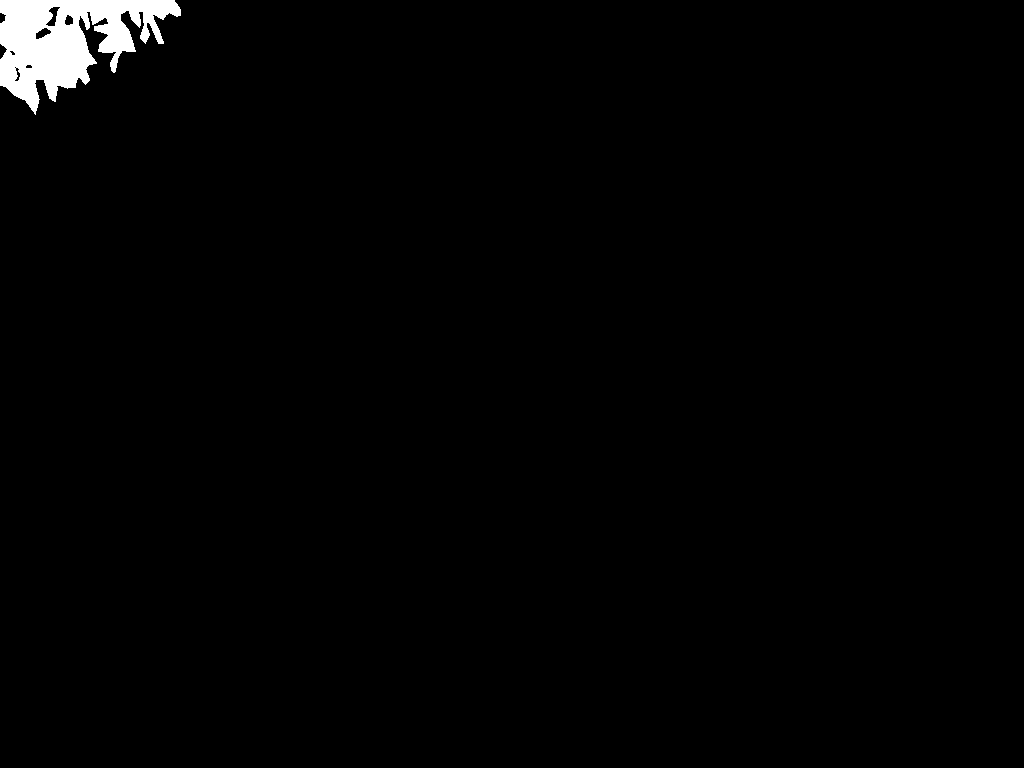

In [10]:
import numpy as np

for instance in np.unique(np.array(gt_mask)):
    if instance == 0:
        continue
    display(Image.fromarray(np.array(gt_mask) == instance))
    
